In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
kic, porb, score, prot, signif = np.loadtxt('../Prot_table.csv', skiprows=1, delimiter=',', usecols=[0,1,7,8,9], unpack=True)

(array([0., 0., 0., 1., 0., 5., 1., 1., 0., 0., 0., 0., 0., 1., 1.]),
 array([-0.55, -0.45, -0.35, -0.25, -0.15, -0.05,  0.05,  0.15,  0.25,
         0.35,  0.45,  0.55,  0.65,  0.75,  0.85,  0.95]),
 <a list of 15 Patch objects>)

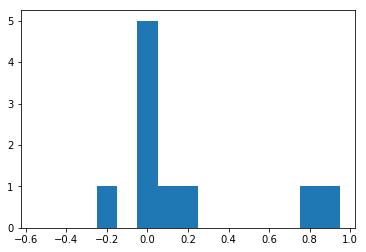

In [54]:
arg = (signif > 0.5) & (score > 0.999) & (porb < 5.) & (kic != 4150611)  # last one is a clear EB so we remove it

# signif is a non-calibrated measurement of the peak of the autocorrelation function from which prot is inferred. 
# By eye, all of the 0.5 values are real. Those larger than 0.2 are all probably good, then they start getting iffy.
# Anything down at 0.005 is probably not real.

# Score is the disposition score in the NASA exoplanet archive for the believability of th


plt.hist(np.log10(prot[arg]/porb[arg]), np.arange(-0.55, 1.05, 0.10))

[[3.24850100e+06 4.18000000e+00 4.22464216e+00]
 [4.45475200e+06 1.49000000e+01 1.61688337e+00]
 [9.87228300e+06 1.86700000e+01 3.12686119e+00]
 [6.39272700e+06 7.70000000e+00 4.58352095e+00]
 [6.50743300e+06 4.63000000e+00 4.74255210e+00]
 [3.76246800e+06 3.06000000e+00 3.00387955e+00]
 [1.02726400e+07 4.07000000e+00 3.77055147e+00]
 [1.06191920e+07 1.21000000e+01 1.48571099e+00]
 [5.44383700e+06 4.22000000e+00 3.65849707e+00]
 [8.19740600e+06 2.46000000e+00 4.15472242e+00]
 [1.23074960e+07 8.00000000e-01 8.05941833e-01]]


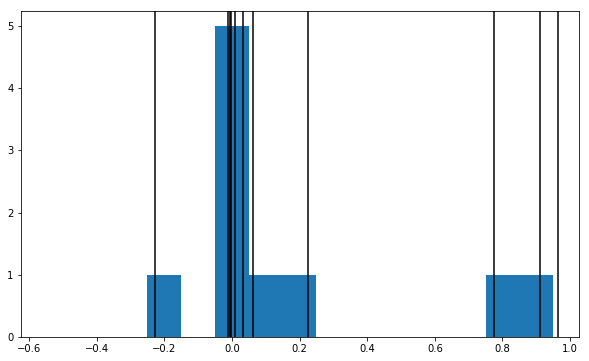

In [55]:
plt.figure(figsize=(10,6))
k1 = kic[arg]
r1 = prot[arg]
o1 = porb[arg]

print(np.array([k1, r1, o1]).T)

plt.hist(np.log10(prot[arg]/porb[arg]), np.arange(-0.55, 1.05, 0.10))
for i in range(len(k1)):
    plt.axvline(np.log10(r1[i]/o1[i]), color='k')

In [56]:
print(k1)

[ 3248501.  4454752.  9872283.  6392727.  6507433.  3762468. 10272640.
 10619192.  5443837.  8197406. 12307496.]


In [65]:
kic, rpl, porb, prot = np.loadtxt('../KOI_periods.txt', skiprows=1, delimiter=',', usecols=[1,4,5,6], unpack=True)


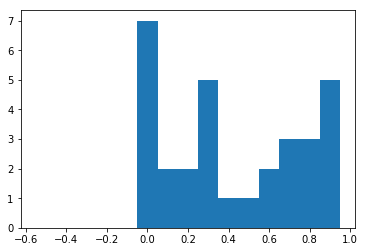

(array([ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,  6.,  4., 23., 13., 26.,
        23., 29.]),
 array([-0.55, -0.45, -0.35, -0.25, -0.15, -0.05,  0.05,  0.15,  0.25,
         0.35,  0.45,  0.55,  0.65,  0.75,  0.85,  0.95]),
 <a list of 15 Patch objects>)

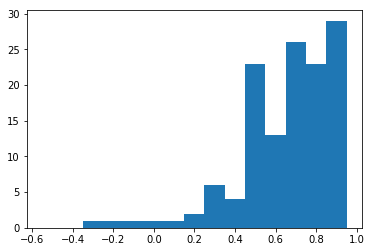

In [71]:
arg = ((porb < 5) & np.isfinite(prot) & (rpl > 4.0))
plt.hist(np.log10(prot[arg]/porb[arg]), np.arange(-0.55, 1.05, 0.10))
plt.show()

arg = ((porb < 5) & np.isfinite(prot) & (rpl < 4.0))
plt.hist(np.log10(prot[arg]/porb[arg]), np.arange(-0.55, 1.05, 0.10))

First one looks slightly different than ours because of false positives in the KOI sample that we remove but are in Mcquillan's tables. Second looks much different than ours because the rotation distribution of small planet host stars is very different than that of large planet host stars!